In [1]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [2]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [3]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [4]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [5]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.3118463221843431, 0.5543684342312136],
 'diameter': 72.02162943704772,
 'confidence': 0.8890053629875183,
 'timestamp': 44785.279287,
 'sphere': {'center': [-2.0156694917529747,
   1.3390397092926716,
   32.00026081425261],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [78.0343891796566, 107.73162032625604],
  'axes': [221.37540420344, 221.37540420344],
  'angle': 0.0},
 'circle_3d': {'center': [-2.659650232601482,
   -0.7101525152487322,
   21.832365258519594],
  'normal': [-0.06196707568030341, -0.19718361374337792, -0.9784062060324096],
  'radius': 2.464849349030477},
 'diameter_3d': 4.929698698060954,
 'ellipse': {'center': [59.87449385939387, 85.56126062760697],
  'axes': [69.64072456999058, 72.02162943704772],
  'angle': 58.59476033563234},
 'location': [59.87449385939387, 85.56126062760697],
 'model_confidence': 1.0,
 'theta': 1.7692806242424557,
 'phi': -1.6340465578960877}

Text(0.5, 0, 'Pupil timestamp (s)')

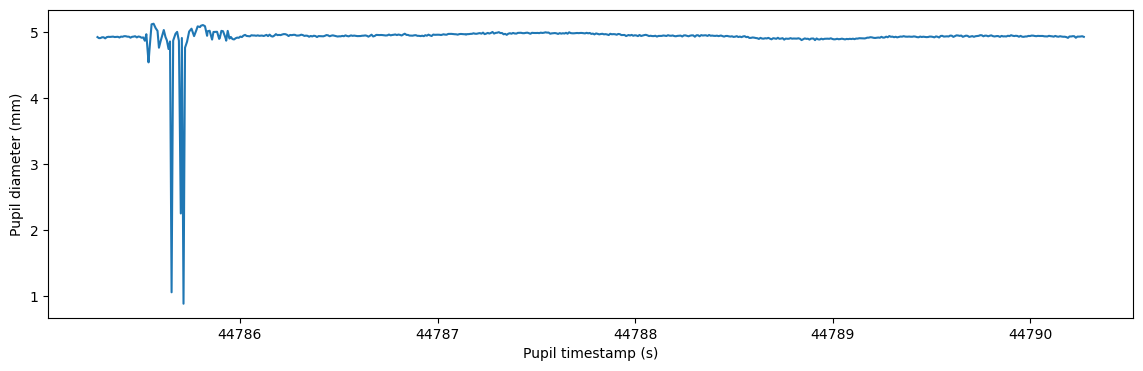

In [6]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')